### ノック１

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
iris = load_iris()

In [50]:
iris.data.shape

(150, 4)

In [51]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [52]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


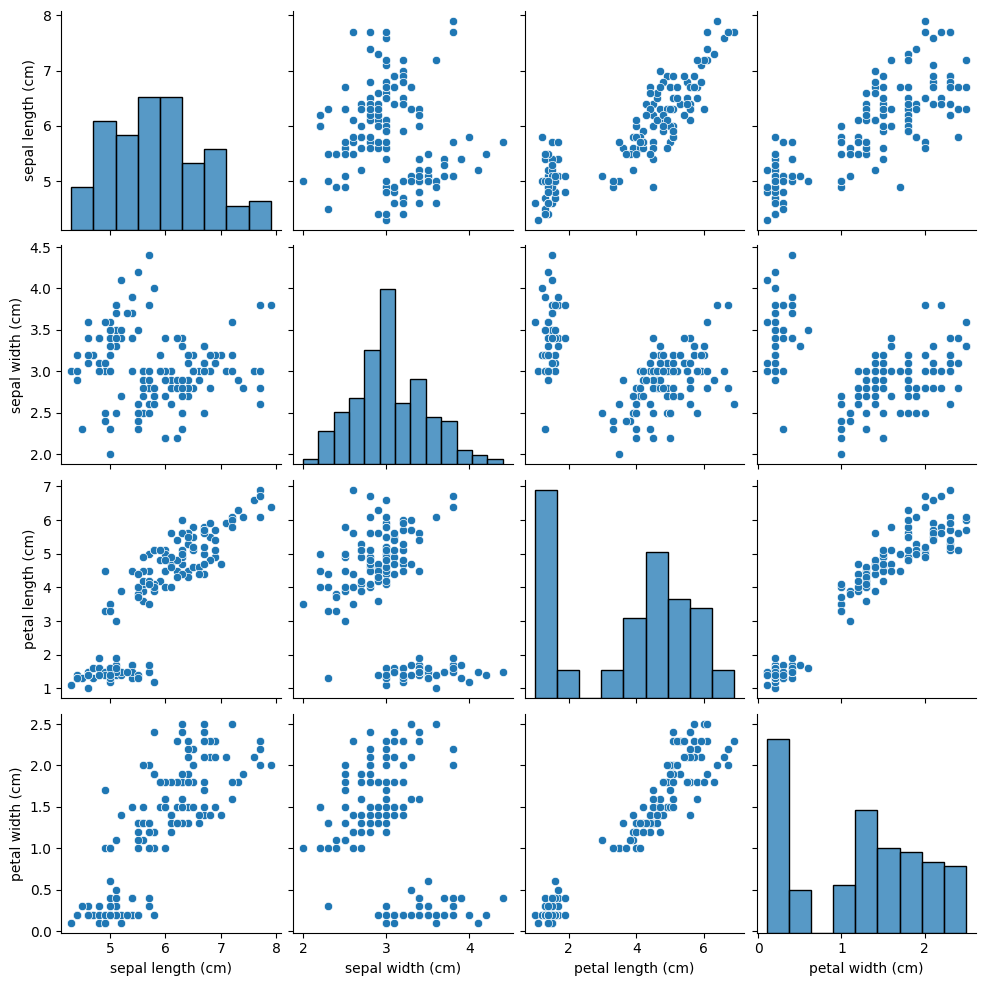

In [54]:
sns.pairplot(df_iris)

In [55]:
model = KMeans(n_clusters=3, random_state=0, init="random", n_init='auto')
cls_data = df_iris.copy()
model.fit(df_iris)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=0)

In [56]:
cluster = model.predict(cls_data)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


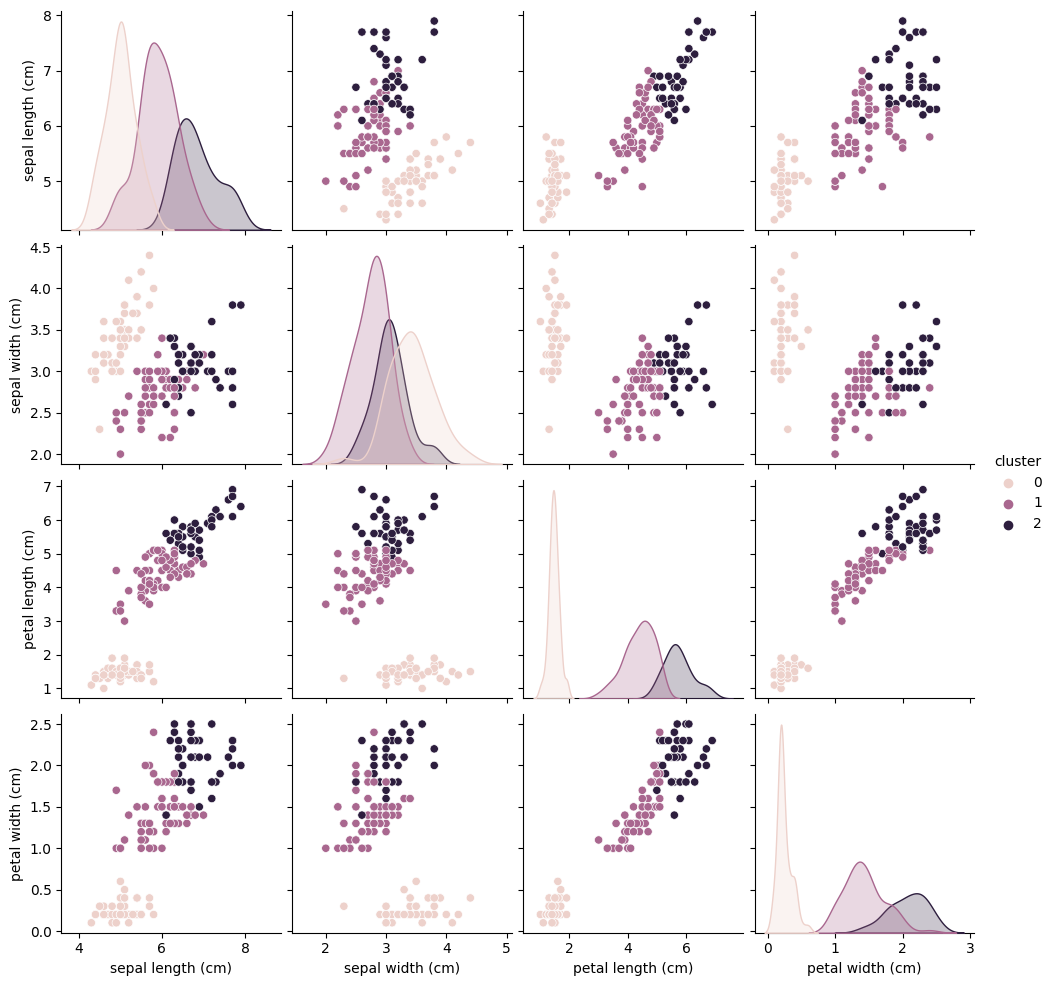

In [57]:
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [58]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
cluster_center

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


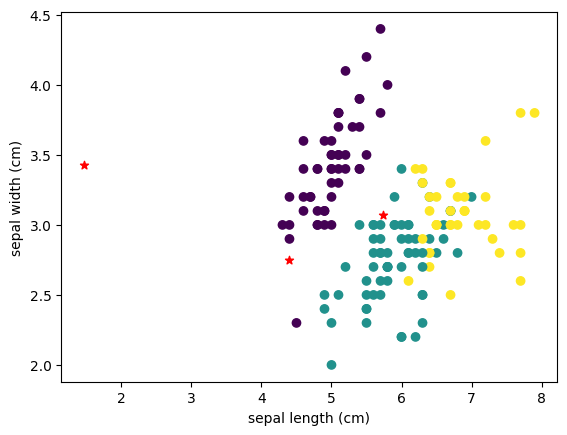

In [59]:
plt.scatter(cls_data["sepal length (cm)"], cls_data["sepal width (cm)"], c=cls_data["cluster"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(cluster_center["petal length (cm)"], cluster_center["sepal width (cm)"], marker="*", color="red")

In [60]:
cls_data.groupby("cluster").mean().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [61]:
cls_data["target"] = iris.target
cls_data.loc[cls_data["target"] == 0, "target"] = "setosa"
cls_data.loc[cls_data["target"] == 1, "target"] = "versicolor"
cls_data.loc[cls_data["target"] == 2, "target"] = "virginica"
cls_data.groupby("target").mean().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


### ノック２

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

In [63]:
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"]))
accuracy = "Accuracy: {:.2f}".format(accuracy_score(iris.target, cls_data["cluster"]))
print(ari)
print(accuracy)

ARI: 0.73
Accuracy: 0.89


### ノック３

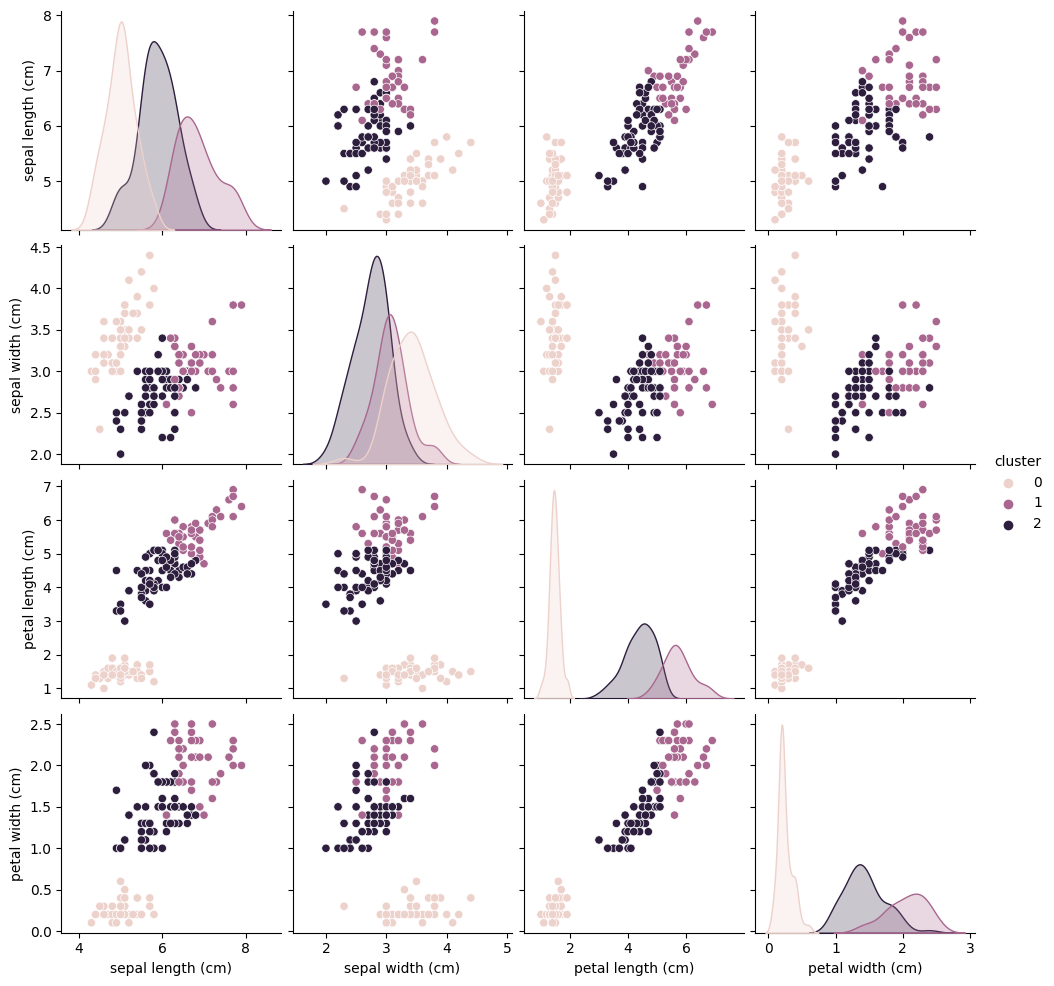

In [64]:
model = KMeans(n_clusters=3, random_state=0, init="k-means++", n_init='auto')
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [65]:
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"]))
print(ari)

ARI: 0.72


ARI: 0.54


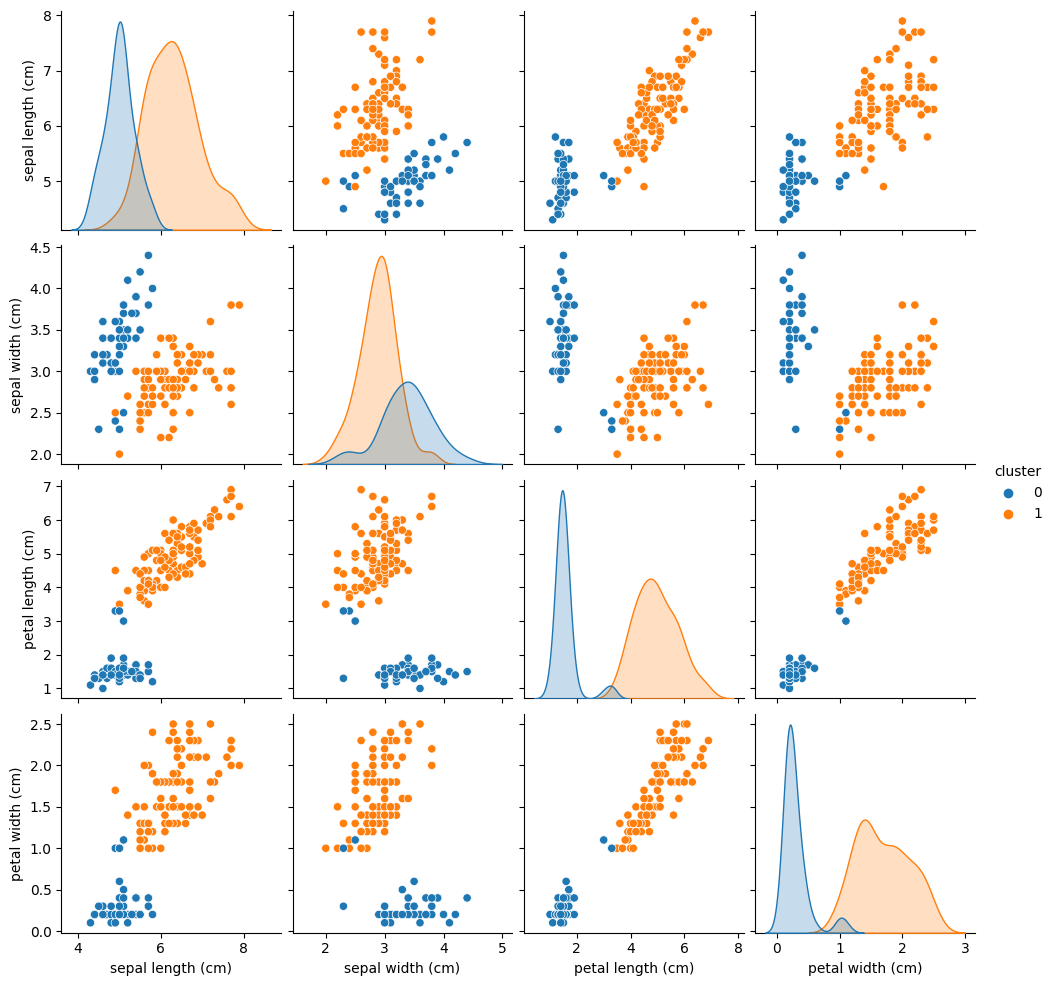

In [66]:
model = KMeans(n_clusters=2, random_state=0, n_init='auto')
cls_data = df_iris.copy()
cls_data["cluster"] = model.fit_predict(cls_data)
sns.pairplot(cls_data, hue="cluster")
print("ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"])))

### ノック４

In [67]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing

<function matplotlib.pyplot.show(close=None, block=None)>

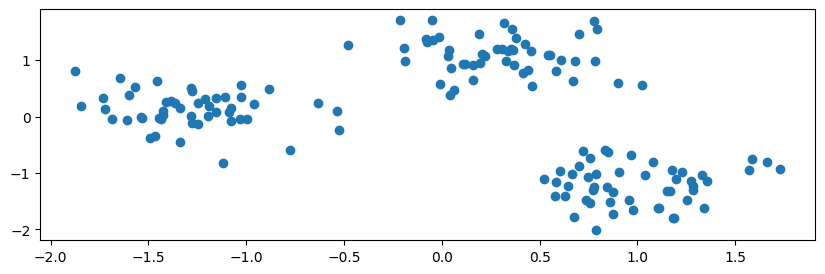

In [68]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:,0]
y = X_norm[:,1]
plt.figure(figsize=(10,3))
plt.scatter(x,y)
plt.show

In [69]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

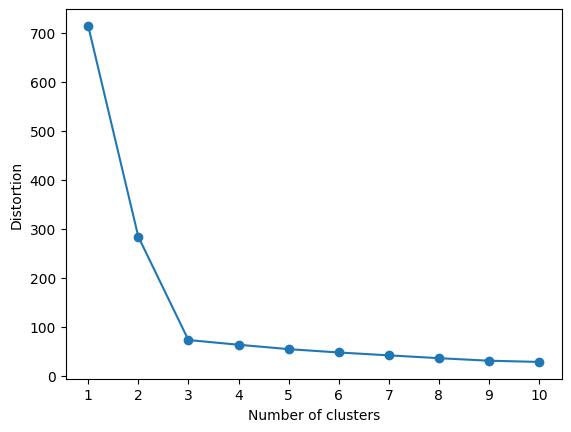

In [74]:
plt.plot(range(1,11), distortions, marker="o")
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

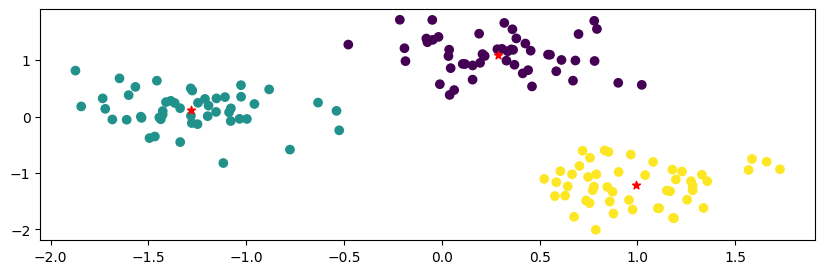

In [75]:
km = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
z_km = km.fit(X_norm)
plt.figure(figsize=(10,3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0], z_km.cluster_centers_[:,1], marker="*", c="red")
plt.show()

### ノック５

In [76]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [77]:
cluster_labels = np.unique(z_km.labels_)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, z_km.labels_)

50
50
50


([<matplotlib.axis.YTick at 0x2c8c22f1e10>,
 [Text(0, 25.0, '1'), Text(0, 75.0, '2'), Text(0, 125.0, '3')])

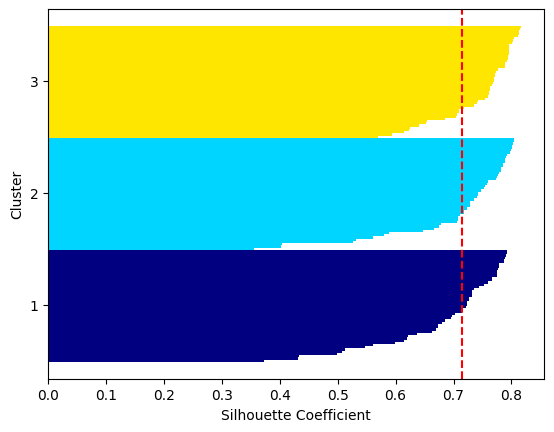

In [96]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[z_km.labels_==c]
    print(len(c_silhouette_vals))
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.yticks(yticks, cluster_labels+1)

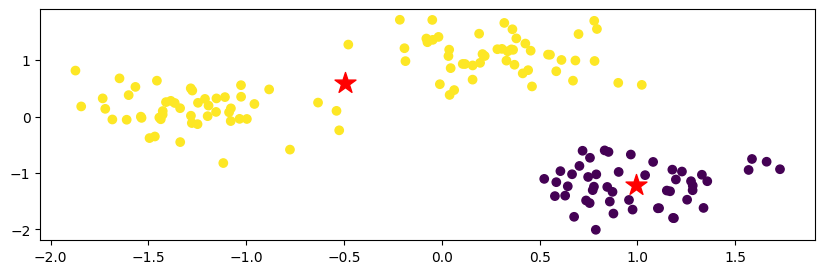

In [100]:
km = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=0)
z_km = km.fit(X_norm)

plt.figure(figsize=(10,3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0], z_km.cluster_centers_[:,1], s=250, marker="*", c="red")
plt.show()

50
100


([<matplotlib.axis.YTick at 0x2c8cf7f8f50>,
 [Text(0, 25.0, '1'), Text(0, 100.0, '2')])

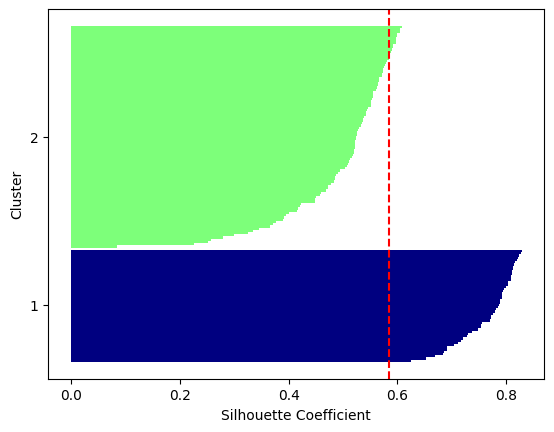

In [101]:
cluster_labels = np.unique(z_km.labels_)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, z_km.labels_)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[z_km.labels_==c]
    print(len(c_silhouette_vals))
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.yticks(yticks, cluster_labels+1)

### ノック６

[1.4 0.2]
[1.5 0.2]
[1.7 0.2]
[1.6 0.2]
[1.3 0.3]
[4.7 1.4]
[3.5 1. ]
[4.8 1.8]
[3.8 1.1]
[4.4 1.2]
[6.  2.5]
[5.1 2. ]
[5.7 2.3]
[6.1 1.9]
[5.6 2.4]


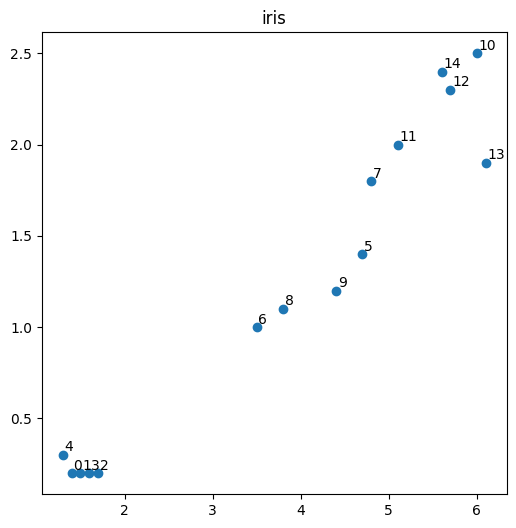

In [109]:
X = load_iris().data[::10, 2:4]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, title="iris")
plt.scatter(X[:, 0], X[:, 1])
for i, element in enumerate(X):
    print(element)
    plt.text(element[0]+0.02, element[1]+0.02, i)
plt.show()

In [110]:
from scipy.cluster.hierarchy import linkage

In [111]:
Z = linkage(X, method="ward", metric="euclidean")
pd.DataFrame(Z)

,0,1,2,3
0,2.0,3.0,0.100000,2.0
1,0.0,1.0,0.100000,2.0
2,12.0,14.0,0.141421,2.0
3,4.0,16.0,0.208167,3.0
4,6.0,8.0,0.316228,2.0
5,5.0,9.0,0.360555,2.0
6,7.0,11.0,0.360555,2.0
7,15.0,18.0,0.390726,5.0
8,10.0,17.0,0.439697,3.0
9,13.0,23.0,0.735980,4.0


### ノック７

In [112]:
from scipy.cluster.hierarchy import dendrogram

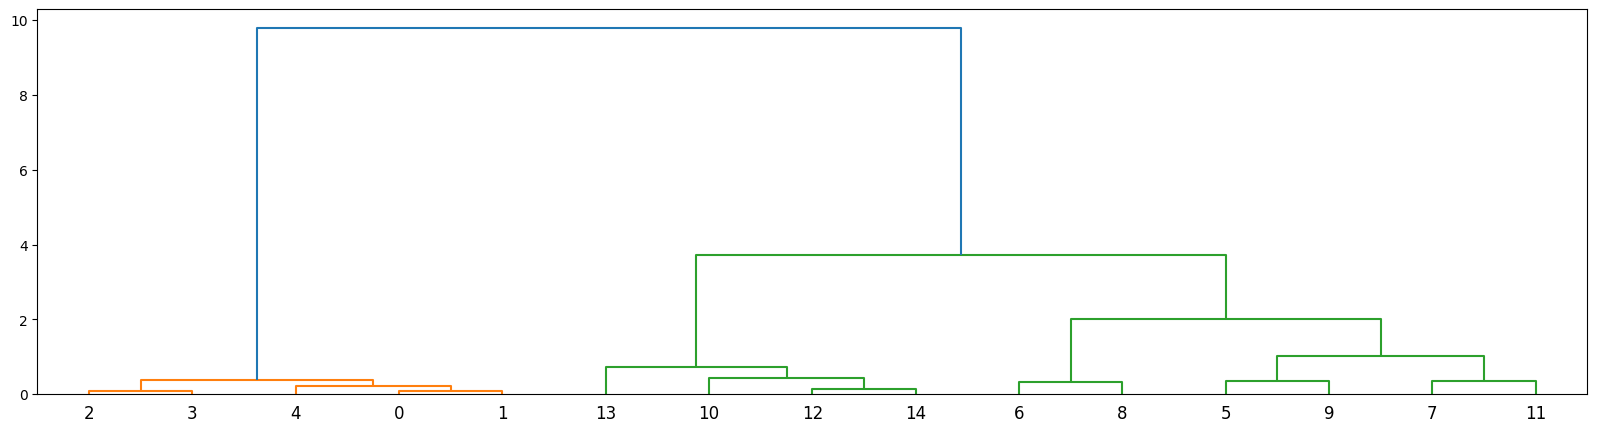

In [118]:
fig2, ax2 = plt.subplots(figsize=(20,5))
ax2 = dendrogram(Z)
plt.show()

In [116]:
from scipy.cluster.hierarchy import fcluster

In [117]:
clusters = fcluster(Z, t=3, criterion="maxclust")
for i, c in enumerate(clusters):
    print(i, c)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


### ノック８

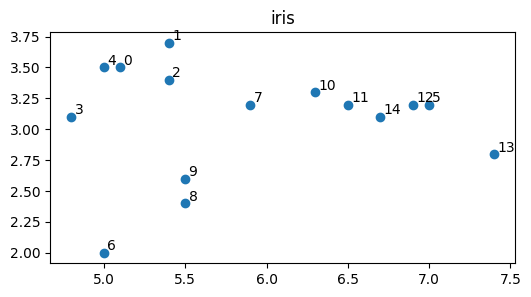

In [119]:
X = load_iris().data[::10]
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 1, 1, title="iris")
plt.scatter(X[:,0], X[:,1])
for i, element in enumerate(X):
    plt.text(element[0]+0.02, element[1]+0.02, i)
plt.show()

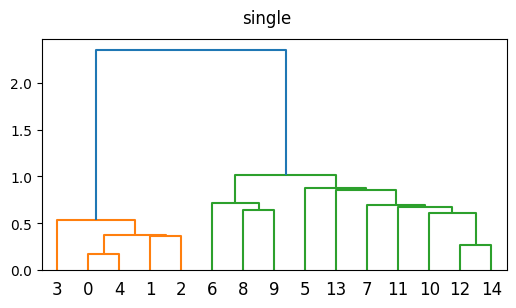

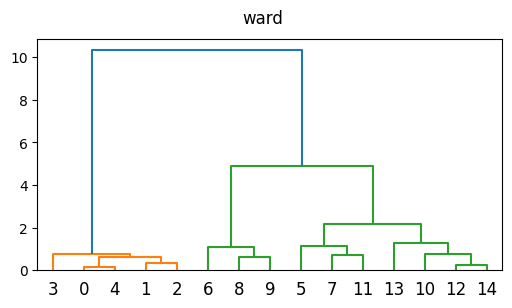

In [120]:
Z = linkage(X, method="single", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("single")
plt.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("ward")
plt.show()

### ノック９

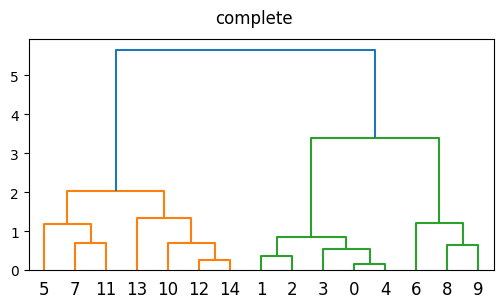

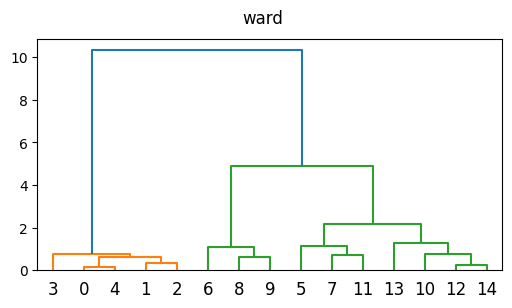

In [121]:
Z = linkage(X, method="complete", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("complete")
plt.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("ward")
plt.show()

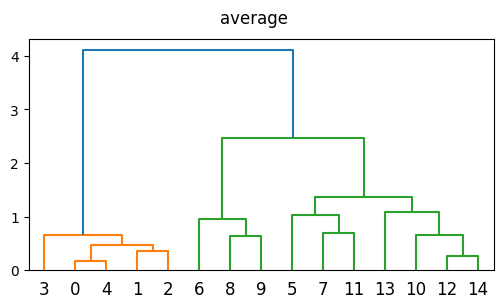

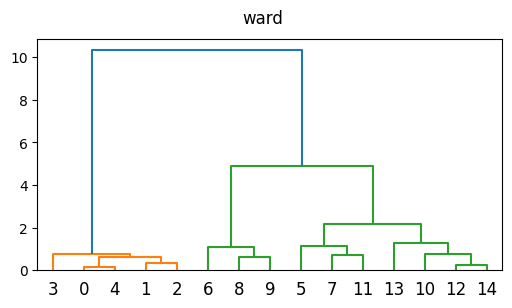

In [122]:
Z = linkage(X, method="average", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("average")
plt.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("ward")
plt.show()